**UTS**

Nama: RAHMA NURHALIZA

NIM  : 210411100176

Kelas : PPW A

# UTS (Keyword Extraction)

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/PPW/tugas/1berita.csv")
#df = pd.read_csv("/content/drive/MyDrive/PPW/tugas/2_Kategoriberita-CNN.csv")
df.head(1)

,judul,berita,tanggal,kategori
0,2 Oknum Suporter Persija Jadi Tersangka Perusa...,Polisi menetapkan dua orang oknum suporter Per...,"Rabu, 25 Sep 2024 01:00 WIB",Olahraga


## Preprossesing

In [33]:
import re
import pandas as pd
import nltk
from nltk.corpus import stopwords

# Pastikan NLTK stopwords sudah diunduh
nltk.download('stopwords')

# Fungsi untuk menghapus URL dari teks.
def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', text)

# Fungsi untuk menghapus tag HTML dari teks.
def remove_html(text):
    html = re.compile(r'<.*?>')
    return html.sub(r'', text)

# Fungsi untuk menghapus emoji dari teks.
def remove_emoji(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF"
        u"\U0001F1E0-\U0001F1FF"
        "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

# Fungsi untuk menghapus angka dari teks.
def remove_numbers(text):
    return re.sub(r'\d+', '', text)

# Fungsi untuk menghapus simbol dan karakter khusus dari teks.
def remove_symbols(text):
    return re.sub(r'[^a-zA-Z0-9\s]', '', text)

# Fungsi untuk melakukan case folding.
def case_folding(text):
    return text.lower() if isinstance(text, str) else text

# Fungsi untuk tokenisasi.
def tokenize(text):
    return text.split()

# Fungsi untuk menghapus stopwords.
def remove_stopwords(tokens, stop_words):
    return [word for word in tokens if word not in stop_words]

# Fungsi utama untuk preprocessing
def preprocess_text(text, stop_words):
    text = remove_url(text)
    text = remove_html(text)
    text = remove_emoji(text)
    text = remove_symbols(text)
    text = remove_numbers(text)
    text = case_folding(text)
    tokens = tokenize(text)
    tokens = remove_stopwords(tokens, stop_words)
    return ' '.join(tokens)

# Asumsikan df adalah DataFrame yang berisi data berita
# Contoh: df = pd.read_csv('berita-cnn.csv')

# Daftar stop words dalam bahasa Indonesia
stop_words = stopwords.words('indonesian')

# Terapkan fungsi preprocessing pada kolom 'berita'
df['berita_preprosessing'] = df['berita'].apply(lambda x: preprocess_text(x, stop_words))

# Tampilkan beberapa baris dari hasil yang sudah dibersihkan
df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,judul,berita,tanggal,kategori,berita_preprosessing
0,2 Oknum Suporter Persija Jadi Tersangka Perusa...,Polisi menetapkan dua orang oknum suporter Per...,"Rabu, 25 Sep 2024 01:00 WIB",Olahraga,polisi menetapkan orang oknum suporter persija...


## Tokenisasi Teks

Melakukan tokenisasi (membagi teks menjadi kata-kata individu)

In [35]:
import nltk
import pandas as pd

# Pastikan NLTK stopwords sudah diunduh
nltk.download('punkt')

# Tokenisasi berita yang sudah dipreprosessing
df['tokens'] = df['berita_preprosessing'].apply(lambda x: nltk.word_tokenize(x))

# Tampilkan hasil tokenisasi
df[['berita_preprosessing', 'tokens']].head(1)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,berita_preprosessing,tokens
0,polisi menetapkan orang oknum suporter persija...,"[polisi, menetapkan, orang, oknum, suporter, p..."


## Membuat Daftar Kata Unik

In [36]:
all_words = list(set([word for tokens in df['tokens'] for word in tokens]))
all_words

['stadion',
 'detikjabar',
 'nyomplong',
 'maaf',
 'rumah',
 'mengalahkan',
 'kemenangan',
 'semalam',
 'orang',
 'indonesia',
 'kasar',
 'u',
 'suporternya',
 'ragnar',
 'harupat',
 'terlibat',
 'negatif',
 'situ',
 'sebutan',
 'pilihan',
 'belgia',
 'memprovokasi',
 'aksi',
 'pemeriksaan',
 'memeriksa',
 'peristiwa',
 'kecamatan',
 'pagar',
 'steward',
 'media',
 'tolak',
 'tanggung',
 'bagus',
 'warga',
 'pascakejadian',
 'panggil',
 'liga',
 'suporter',
 'tersulut',
 'polisi',
 'debut',
 'perusakan',
 'cnn',
 'pasal',
 'mencabut',
 'timor',
 'kelurahan',
 'pelatih',
 'selepas',
 'merusak',
 'gali',
 'polres',
 'sukabumi',
 'soreang',
 'maksimal',
 'kerusuhan',
 'munculkan',
 'dikutip',
 'masuk',
 'reaksi',
 'hadir',
 'bandung',
 'pajagalan',
 'penyidik',
 'identitas',
 'jak',
 'oratmangoen',
 'memisahkan',
 'menyebut',
 'the',
 'si',
 'bertambah',
 'ketua',
 'jun',
 'berperan',
 'jalak',
 'sosial',
 'redaksi',
 'dugaan',
 'jalan',
 'maraton',
 'pidana',
 'terancam',
 'leste',
 'pen

## Matriks Kemunculan Kata Berpasangan (co-occurrence matrix )

Setiap baris dan kolom mewakili kata-kata unik, dan nilai di setiap sel mewakili berapa kali kata-kata tersebut muncul berdekatan di dalam teks.

In [37]:
# Membuat matriks ko-occurence
matrikskata = pd.DataFrame(0, index=all_words, columns=all_words)

# Mengisi matriks ko-occurence
for tokens in df['tokens']:
    for i in range(len(tokens)-1):
        # Increment kata yang muncul berdekatan
        matrikskata.at[tokens[i], tokens[i+1]] += 1
        matrikskata.at[tokens[i+1], tokens[i]] += 1

matrikskata


,stadion,detikjabar,nyomplong,maaf,rumah,mengalahkan,kemenangan,semalam,orang,indonesia,...,oknum,penjara,menyerang,perusak,spanduk,reskrim,persib,lantaran,freitas,persija
stadion,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
detikjabar,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
nyomplong,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
maaf,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
rumah,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
reskrim,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
persib,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
lantaran,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freitas,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Menghitung Cosine Similarity

In [38]:
from sklearn.metrics.pairwise import cosine_similarity

# Menghitung cosine similarity antar kata
cosine_sim = cosine_similarity(matrikskata, matrikskata)
cosine_sim_df = pd.DataFrame(cosine_sim, index=all_words, columns=all_words)

# Tampilkan sebagian matriks cosine similarity
cosine_sim_df


,stadion,detikjabar,nyomplong,maaf,rumah,mengalahkan,kemenangan,semalam,orang,indonesia,...,oknum,penjara,menyerang,perusak,spanduk,reskrim,persib,lantaran,freitas,persija
stadion,1.0,0.0,0.0,0.00,0.000000,0.00,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.00,0.000000,0.0,0.00,0.000000,0.0,0.0
detikjabar,0.0,1.0,0.0,0.00,0.000000,0.00,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.00,0.000000,0.0,0.00,0.000000,0.0,0.0
nyomplong,0.0,0.0,1.0,0.00,0.000000,0.00,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.00,0.000000,0.0,0.00,0.000000,0.0,0.0
maaf,0.0,0.0,0.0,1.00,0.000000,0.00,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.00,0.353553,0.0,0.25,0.000000,0.0,0.0
rumah,0.0,0.0,0.0,0.00,1.000000,0.00,0.0,0.223607,0.000000,0.0,...,0.000000,0.0,0.0,0.00,0.000000,0.0,0.00,0.223607,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
reskrim,0.0,0.0,0.0,0.00,0.000000,0.00,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.00,0.000000,1.0,0.00,0.000000,0.0,0.0
persib,0.0,0.0,0.0,0.25,0.000000,0.25,0.0,0.000000,0.176777,0.0,...,0.000000,0.0,0.0,0.25,0.176777,0.0,1.00,0.000000,0.0,0.0
lantaran,0.0,0.0,0.0,0.00,0.223607,0.00,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.00,0.000000,0.0,0.00,1.000000,0.0,0.0
freitas,0.0,0.0,0.0,0.00,0.000000,0.00,0.0,0.000000,0.000000,0.5,...,0.000000,0.0,0.0,0.00,0.000000,0.0,0.00,0.000000,1.0,0.0


## Membuat Graf

Jumlah kata (nodes): 143
Jumlah edge: 13


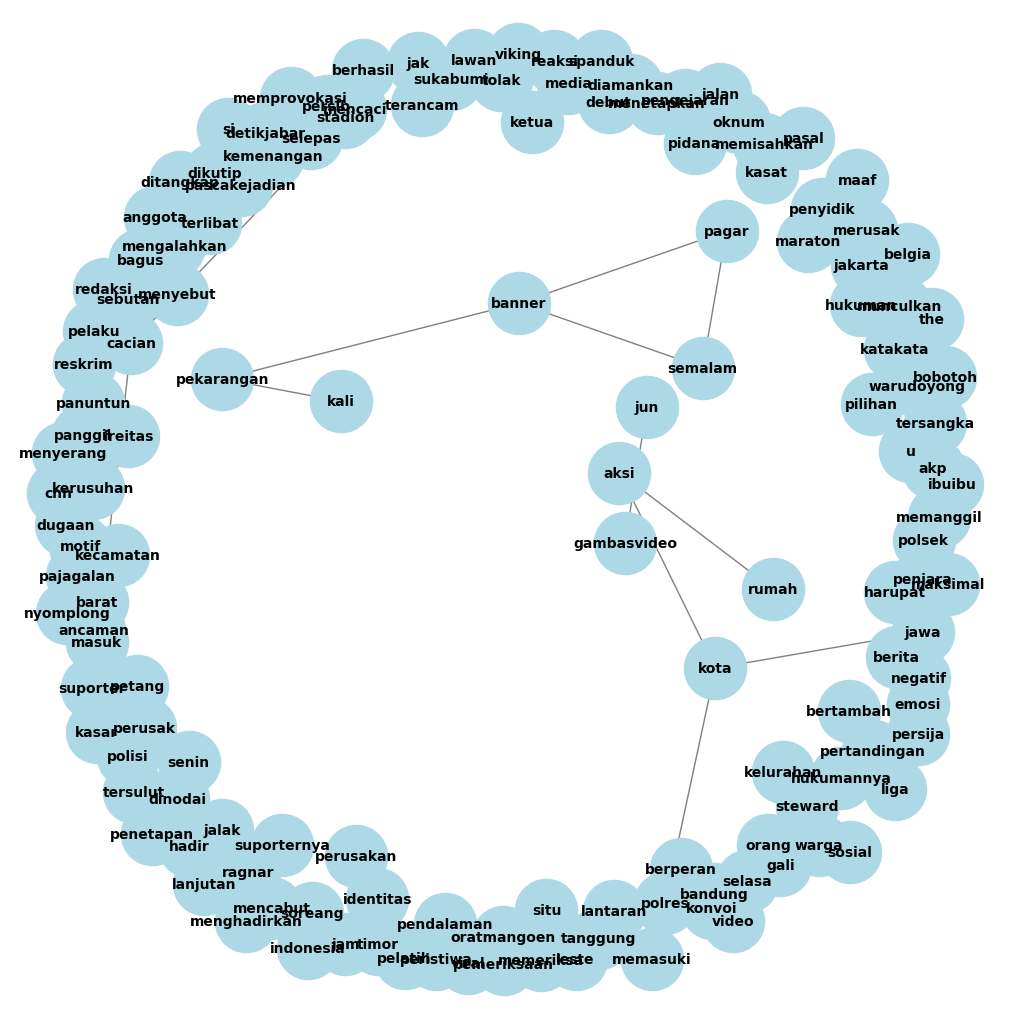

In [39]:
import networkx as nx
import matplotlib.pyplot as plt

# Membuat graf berdasarkan cosine similarity
G = nx.Graph()

# Menambahkan semua node
for word in all_words:
    G.add_node(word)

# Menambahkan edges berdasarkan nilai cosine similarity
threshold = 0.5  # Batasan minimum cosine similarity untuk edge
for i in range(len(all_words)):
    for j in range(i+1, len(all_words)):
        if cosine_sim_df.iloc[i, j] >= threshold:
            G.add_edge(all_words[i], all_words[j], weight=cosine_sim_df.iloc[i, j])

print(f"Jumlah kata (nodes): {G.number_of_nodes()}")
print(f"Jumlah edge: {G.number_of_edges()}")

# Menampilkan graf
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G, k=0.5)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, font_size=10, font_weight='bold')
plt.show()

## Centrality

In [40]:
# Menghitung PageRank (centrality) untuk menemukan kata kunci
pagerank = nx.pagerank(G)
# Mengurutkan kata berdasarkan nilai PageRank
sorted_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)

betweenness_centrality = nx.betweenness_centrality(G)
sorted_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)

print("Page Rank :")
for node, pagerank in sorted_pagerank[:10]:
  print(f"Node {node}: {pagerank:.4f}")

print('')

print("Betweenness Centrality:")
for node, betweenness in sorted_betweenness[:10]:
    print(f"Node {node}: {betweenness:.4f}")



Page Rank :
Node kota: 0.0483
Node cacian: 0.0407
Node banner: 0.0406
Node aksi: 0.0350
Node pagar: 0.0284
Node pekarangan: 0.0283
Node jun: 0.0279
Node emosi: 0.0279
Node gambasvideo: 0.0279
Node konvoi: 0.0279

Betweenness Centrality:
Node kota: 0.0005
Node banner: 0.0004
Node aksi: 0.0003
Node pekarangan: 0.0003
Node cacian: 0.0001
Node stadion: 0.0000
Node detikjabar: 0.0000
Node nyomplong: 0.0000
Node maaf: 0.0000
Node rumah: 0.0000


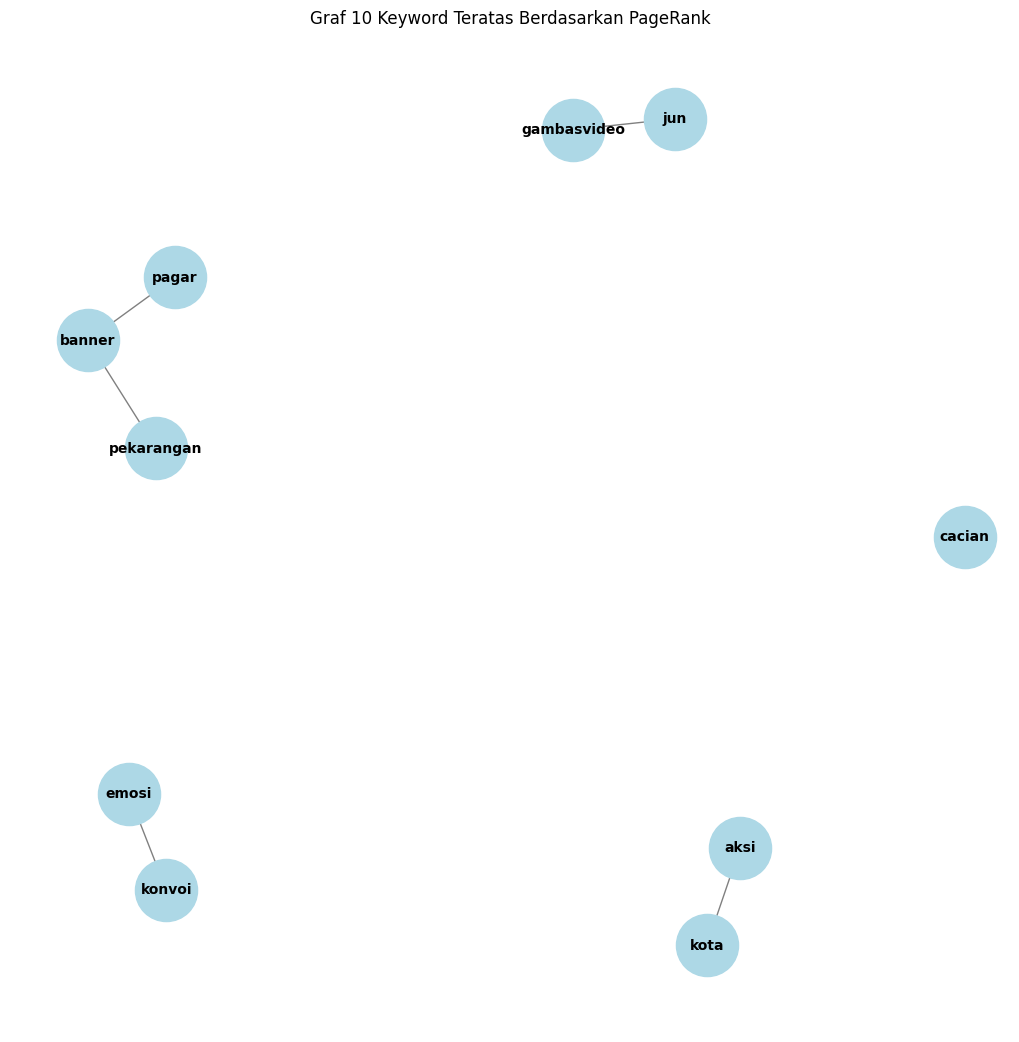

10 Keyword Teratas:
kota: 0.0483
cacian: 0.0407
banner: 0.0406
aksi: 0.0350
pagar: 0.0284
pekarangan: 0.0283
jun: 0.0279
emosi: 0.0279
gambasvideo: 0.0279
konvoi: 0.0279


In [41]:
import networkx as nx
import matplotlib.pyplot as plt


# Mengambil 10 keyword teratas
top_keywords = sorted_pagerank[:10]

# Membuat graf hanya untuk 10 keyword teratas
top_keywords_graph = nx.Graph()

# Menambahkan nodes dan edges dari keyword teratas
for keyword, score in top_keywords:
    top_keywords_graph.add_node(keyword)

# Menambahkan edges berdasarkan nilai cosine similarity dari graf asli
for i in range(len(top_keywords)):
    for j in range(i+1, len(top_keywords)):
        keyword1 = top_keywords[i][0]
        keyword2 = top_keywords[j][0]
        if G.has_edge(keyword1, keyword2):  # Cek apakah ada edge dalam graf asli
            weight = G[keyword1][keyword2]['weight']  # Dapatkan bobot dari edge
            top_keywords_graph.add_edge(keyword1, keyword2, weight=weight)

# Menampilkan graf untuk 10 keyword teratas
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(top_keywords_graph, k=0.5)
nx.draw(top_keywords_graph, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, font_size=10, font_weight='bold')
plt.title("Graf 10 Keyword Teratas Berdasarkan PageRank")
plt.show()

# Menampilkan 10 keyword teratas
print("10 Keyword Teratas:")
for keyword, score in top_keywords:
    print(f"{keyword}: {score:.4f}")


## Keyword Extraction

In [42]:
# Keyword Extraction menggunakan pagerank keyword teratas
num_keywords = 5
keywords = [word for word, score in sorted_pagerank[:num_keywords]]

print("Keywords Extraction:")
keywords


Keywords Extraction:


['kota', 'cacian', 'banner', 'aksi', 'pagar']